In [2]:
# DATASET
# https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.metrics import confusion_matrix, classification_report
import os
import PIL
import PIL.Image

from pathlib import Path

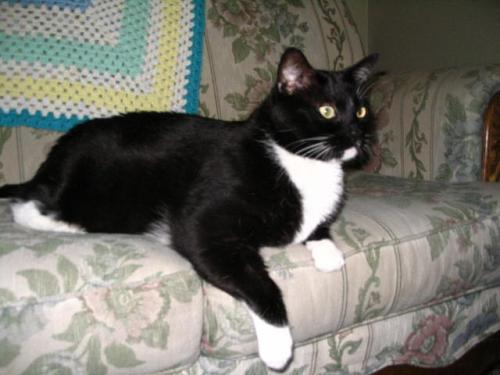

In [4]:
PIL.Image.open("data/cat/63.jpg")

In [5]:
def load_data():
    X = []
    y = []
    for animal in ["cat", "dog"]:
        for i, file in enumerate(
            [str(x) for x in Path(f"/Users/ryan/data/{animal}").glob("[0-9]*")]
        ):  # /Users/ryan/data for more
            if i == 1000:
                break
            # print(file)
            im = PIL.Image.open(file).resize((64, 64))  # .convert("L").
            arr = np.asarray(im).astype(np.float32)
            # print(arr.shape)
            X.append(arr.tolist())
            if animal == "cat":
                y.append(1)
            else:
                y.append(0)
    return np.asarray(X), np.asarray(y), im


X, y, im = load_data()

/opt/homebrew/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [6]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


X, y = unison_shuffled_copies(X, y)

In [7]:
from math import inf

N = round(X.shape[0] * 0.7)
M = X.shape[0]
X_train, y_train = X[:N], y[:N]
X_test, y_test = X[N:M], y[N:M]

print(X.shape)
for x in [X_train, y_train, X_test, y_test]:
    print(x.shape)

(2000, 64, 64, 3)
(1400, 64, 64, 3)
(1400,)
(600, 64, 64, 3)
(600,)


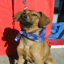

In [8]:
im

In [9]:
m, n = np.asarray(im).shape[:2]
print(m, n)

64 64


In [10]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.Rescaling(
            1.0 / 255, input_shape=(m, n, 3)
        ),
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
        tf.keras.layers.Conv2D(
            16,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(
            64,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(
            256,
            (3, 3),
            activation="relu",
            kernel_initializer="he_uniform",
            padding="same",
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_uniform"),
        tf.keras.layers.Dropout(0.35),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ],
    name="cat_model",
)

In [11]:
# model = Sequential(
#     [
#         Conv2D(128, (3, 3), activation="relu"),
#         MaxPooling2D((2, 2), strides=2),

#         Conv2D(64, (3, 3), activation="relu"),
#         MaxPooling2D((2, 2), strides=2),

#         Conv2D(32, (3, 3), activation="relu"),
#         MaxPooling2D((2, 2), strides=2),

#         Flatten(),

#         Dense(1024, activation="relu"),
#         Dense(512, activation="relu"),
#         Dense(256, activation="relu"),
#         Dense(64, activation="relu"),
#         Dense(1, activation="sigmoid"),
#     ],
#     name="cat_model",
# )

In [12]:
model.layers

In [13]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [14]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


2022-08-31 20:50:42.523393: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


44/44 [==============================] - 2s 38ms/step - loss: 1.0528
Epoch 2/50
44/44 [==============================] - 2s 38ms/step - loss: 0.7236
Epoch 3/50
44/44 [==============================] - 2s 44ms/step - loss: 0.6659
Epoch 4/50
44/44 [==============================] - 2s 39ms/step - loss: 0.6542
Epoch 5/50
44/44 [==============================] - 2s 37ms/step - loss: 0.6535
Epoch 6/50
44/44 [==============================] - 2s 37ms/step - loss: 0.6487
Epoch 7/50
44/44 [==============================] - 2s 38ms/step - loss: 0.6331
Epoch 8/50
44/44 [==============================] - 2s 39ms/step - loss: 0.6265
Epoch 9/50
44/44 [==============================] - 2s 40ms/step - loss: 0.6283
Epoch 10/50
44/44 [==============================] - 2s 38ms/step - loss: 0.6255
Epoch 11/50
44/44 [==============================] - 2s 46ms/step - loss: 0.6342
Epoch 12/50
44/44 [==============================] - 2s 41ms/step - loss: 0.6176
Epoch 13/50
44/44 [=============================

In [15]:
model

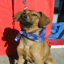

In [16]:
im

In [17]:
ans = model.predict(X_test)

19/19 [==============================] - 0s 15ms/step


In [18]:
yhat = []
for x in ans:
    if x >= 0.5:
        yhat.append(1)
    else:
        yhat.append(0)
yhat = np.array(yhat)
print(yhat.shape, yhat[:20])

(600,) [0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]


In [19]:
print(f"{(np.sum(yhat == y_test) / yhat.shape[0]) * 100}% accuracy")

69.0% accuracy


In [27]:
classification_report(yhat, y_test, output_dict=True)['accuracy']

0.69